## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = (range_end - range_start) * np.random.random(num_samples) + range_start
    y = 0.1 * X ** 5 + X ** 4 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3 + np.random.normal(loc=0, scale=noise_std, size=num_samples)
    return X, y

In [2]:
X, y = generate_dataset(-4, -1, 1000)
print(X)
print(y)

[-1.68856778 -3.70537195 -1.52134478 -1.76561887 -2.76489795 -3.54832266
 -2.72260011 -2.52504566 -2.14760685 -3.35963067 -2.84626787 -2.80045904
 -1.07222583 -1.95407633 -3.56092847 -1.62121173 -3.91577125 -1.35449947
 -1.43995283 -1.89027839 -1.60181861 -3.15898099 -3.53911359 -2.36232082
 -2.06729165 -3.19288371 -1.09166456 -2.83501613 -3.28316104 -1.18814565
 -2.57653889 -2.79833104 -3.17136789 -2.75534302 -2.400315   -1.15193487
 -3.17307046 -1.42423253 -1.37989866 -1.30507593 -1.50525885 -3.01012275
 -3.00287209 -2.50649342 -2.25011382 -1.83035959 -3.23735159 -2.72787072
 -3.44543405 -3.40940815 -3.13150616 -3.15757821 -2.3933945  -2.15816981
 -1.93017879 -2.64070819 -1.5014455  -2.66167154 -3.67080051 -2.73083259
 -2.56743076 -1.49596937 -1.45072176 -1.56024581 -3.9165782  -2.19997955
 -1.67194475 -1.03928952 -2.64120589 -3.91115926 -1.41953354 -1.61416622
 -2.44003253 -3.50735798 -1.76608648 -3.52940648 -3.4249596  -3.6288364
 -3.03886724 -3.23921846 -3.52258176 -3.15582642 -1.

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [3]:
from sklearn.model_selection import train_test_split

degree = 5
# TODO: Split dataset into training and in-range testing
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, random_state=42, train_size=0.8)

# TODO: Generate out-of-range testing set
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_polynomial_regression(X, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    polynomial_features.fit(X.reshape(-1, 1), y)
    X_poly = polynomial_features.transform(X.reshape(-1, 1))
    linear_regression = LinearRegression()
    linear_regression.fit(X_poly, y)
    return linear_regression

In [5]:
models = {}
# TODO: Put the models with different degrees in the models dict
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)
    print(d)
    print(models[d].coef_)

2
[ 0.         82.31224033 42.82923111]
3
[ 0.         -0.81613837  6.75191678 -4.83727975]
4
[ 0.         -3.93420501  4.6418322  -5.43317777 -0.05982012]
5
[  0.         -57.18430969 -44.49247522 -26.94401446  -4.55258588
  -0.36013246]
6
[ 0.         23.6918231  50.53331945 30.04166915 13.90028331  2.70986498
  0.20573862]
7
[ 0.00000000e+00 -3.18344711e+02 -4.35621590e+02 -3.39440184e+02
 -1.48597449e+02 -3.87490097e+01 -5.49098903e+00 -3.26060061e-01]


## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [6]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test_sets, y_test_sets):
    losses = {}
    for degree, model in models.items():
        polynomial_features = PolynomialFeatures(degree=degree)
        X_test_transformed = polynomial_features.fit_transform(X_test_sets.reshape(-1, 1))
        y_pred = model.predict(X_test_transformed)
        mse = mean_squared_error(y_test_sets, y_pred)
        losses[degree] = mse
    return losses

In [7]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


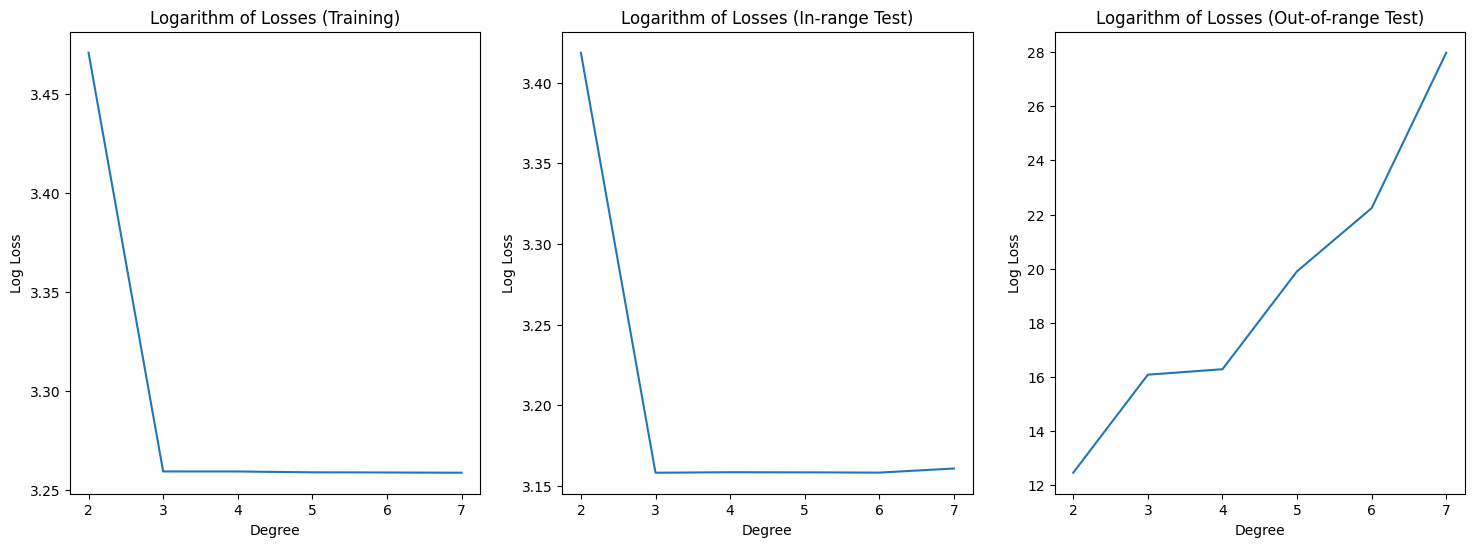

In [8]:
from matplotlib import pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

log_losses_train = np.log(np.array(list(losses_train.values())))
log_losses_in_range = np.log(np.array(list(losses_in_range.values())))
log_losses_out_of_range = np.log(np.array(list(losses_out_of_range.values())))

ax1.set_title('Logarithm of Losses (Training)')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Log Loss')
ax1.plot(list(models.keys()), log_losses_train)

ax2.set_title('Logarithm of Losses (In-range Test)')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Log Loss')
ax2.plot(list(models.keys()), log_losses_in_range)

ax3.set_title('Logarithm of Losses (Out-of-range Test)')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Log Loss')
ax3.plot(list(models.keys()), log_losses_out_of_range)


plt.show()

## Conclusion (10 Points)

Now print out the losses on each set here. 

In [9]:
print(f'training set losses: {losses_train}')
print(f'in-ragne test set losses: {losses_in_range}')
print(f'out-of-range test set losses: {losses_out_of_range}')

training set losses: {2: 32.166092758728155, 3: 26.035351805782273, 4: 26.03480345643873, 5: 26.02366200604796, 6: 26.021538115470165, 7: 26.018422578504655}
in-ragne test set losses: {2: 30.52450962701425, 3: 23.527265062408986, 4: 23.534380397538747, 5: 23.532336173802687, 6: 23.52905456314449, 7: 23.588869843487856}
out-of-range test set losses: {2: 259385.66247322835, 3: 9689347.61162996, 4: 11847939.316102857, 5: 440891295.58871096, 6: 4543789081.230741, 7: 1411602709821.964}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**<br>
by increasing degree, our models get over fitted to train set, therefore training set losses start to converge. on the other hand, in-range test set losses start to increase after degree=5 showing overfitting (just like under fitting happenes in small degrees such as 2). on the other hand the out-of-range test set is something totally different from what our model was trained for, and chances of having much bigger error increases by increasing degree of our model, therefore we obtain a large error in degree=7, but smaller errors in more simple models with smaller degrees. <br>
in conclusion, focusing on reducing variance is important when the model is overfitting to the training data, while focusing on reducing bias is important when the model is failing to capture the underlying patterns in the data. The choice of model complexity (degree of polynomial regression in some cases) plays an important role in balancing bias and variance.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.